In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
temp = pd.read_csv('train.csv')
tempt = pd.read_csv('test.csv')


In [3]:
df1 = temp.copy()
df2 = tempt.copy()

In [4]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
df1['From'] = 'Train'
df2['From'] = 'Test'
df = pd.concat([df1,df2],axis=0,ignore_index=True)

In [7]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,From
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Train
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Train
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Train
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Train
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Train


In [8]:
df[df['From']=='Test'].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,From
8693,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,NaN,Test
8694,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,NaN,Test
8695,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,NaN,Test
8696,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,NaN,Test
8697,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,NaN,Test


## Missing and duplicated value imputation 

In [9]:
df1.duplicated().sum()

0

In [10]:
df2.duplicated().sum()

0

There are no duplicated Values

Splitting passeger id into two columns "passenger_id","travelling_with",and dropping passenger_id

In [11]:
df['Travelling_with'] = df['PassengerId'].apply(lambda x:int(x[6:]))


Here we can aslo drop name as it wont in model prediciton

In [12]:
df = df.drop(columns=['PassengerId','Name'])

In [13]:
df['Paid'] = df['Spa']+df['VRDeck']+df['ShoppingMall']+df['RoomService']+df['FoodCourt']

In [14]:
df = df.drop(columns=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])

In [15]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,From,Travelling_with,Paid
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False,Train,1,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True,Train,1,736.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False,Train,1,10383.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False,Train,2,5176.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True,Train,1,1091.0


In [16]:
df.describe()

,Age,Travelling_with,Paid
count,12700.000000,12970.000000,11607.000000
mean,28.771969,1.511488,1470.478677
std,14.387261,1.042500,2839.745266
min,0.000000,1.000000,0.000000
25%,19.000000,1.000000,0.000000
50%,27.000000,1.000000,729.000000
75%,38.000000,2.000000,1462.500000
max,79.000000,8.000000,35987.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       12682 non-null  object 
 1   CryoSleep        12660 non-null  object 
 2   Cabin            12671 non-null  object 
 3   Destination      12696 non-null  object 
 4   Age              12700 non-null  float64
 5   VIP              12674 non-null  object 
 6   Transported      8693 non-null   object 
 7   From             12970 non-null  object 
 8   Travelling_with  12970 non-null  int64  
 9   Paid             11607 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1013.4+ KB


In [18]:
df.isnull().sum()/len(df)*100

HomePlanet          2.220509
CryoSleep           2.390131
Cabin               2.305320
Destination         2.112567
Age                 2.081727
VIP                 2.282190
Transported        32.976099
From                0.000000
Travelling_with     0.000000
Paid               10.508867
dtype: float64

<AxesSubplot:xlabel='Paid'>

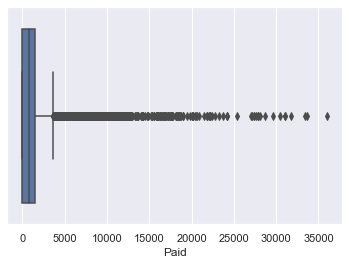

In [19]:
sns.boxplot(df['Paid'])

In [20]:
df['Paid'] = df['Paid'].fillna(df['Paid'].median())

In [21]:
df.select_dtypes(include='object').columns.values

array(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Transported', 'From'], dtype=object)

In [22]:
obj_array=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [23]:
for ele in obj_array:
    df[ele] = df[ele].fillna(df[ele].mode()[0])
    

In [24]:
df.isnull().sum()

HomePlanet            0
CryoSleep             0
Cabin                 0
Destination           0
Age                 270
VIP                   0
Transported        4277
From                  0
Travelling_with       0
Paid                  0
dtype: int64

Imputing missing values for categorical variables

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       12970 non-null  object 
 1   CryoSleep        12970 non-null  bool   
 2   Cabin            12970 non-null  object 
 3   Destination      12970 non-null  object 
 4   Age              12700 non-null  float64
 5   VIP              12970 non-null  bool   
 6   Transported      8693 non-null   object 
 7   From             12970 non-null  object 
 8   Travelling_with  12970 non-null  int64  
 9   Paid             12970 non-null  float64
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 836.1+ KB


In [26]:
int_array=[ 'Age', 'Paid']

In [27]:
df.select_dtypes(exclude='object').columns.values

array(['CryoSleep', 'Age', 'VIP', 'Travelling_with', 'Paid'], dtype=object)

In [28]:
for ele in df.columns.values:
    print("**************************",ele,"************************************")
    print(set(df[ele].tolist()))
    print()

************************** HomePlanet ************************************
{'Mars', 'Europa', 'Earth'}

************************** CryoSleep ************************************
{False, True}

************************** Cabin ************************************
{'G/783/S', 'F/1432/S', 'F/472/S', 'E/185/P', 'F/1336/P', 'E/547/S', 'F/742/S', 'E/582/P', 'E/336/S', 'E/219/S', 'G/548/S', 'F/1156/S', 'G/455/S', 'G/958/P', 'B/52/P', 'C/238/S', 'G/393/S', 'D/32/P', 'G/1198/P', 'F/1291/P', 'F/1510/P', 'E/166/P', 'G/1138/P', 'G/243/P', 'B/294/P', 'G/1450/P', 'C/162/S', 'E/580/S', 'E/504/S', 'G/709/S', 'F/831/P', 'G/589/S', 'F/1345/P', 'E/103/P', 'F/144/S', 'E/104/S', 'G/1383/S', 'A/97/S', 'G/1027/S', 'F/493/P', 'E/115/P', 'F/565/P', 'E/23/P', 'F/1080/S', 'G/297/P', 'C/141/S', 'G/1161/P', 'C/19/P', 'F/1684/S', 'E/461/P', 'G/1338/S', 'G/930/S', 'C/42/P', 'F/737/P', 'E/515/P', 'F/1770/S', 'F/1368/P', 'F/196/S', 'G/1344/S', 'D/205/S', 'F/1179/P', 'C/181/S', 'E/140/P', 'E/126/P', 'F/993/P', 'E/228/S

In [29]:
def plot_box(ele,df):
    sns.boxplot(df[ele])
    plt.show()

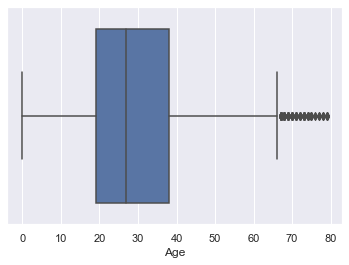

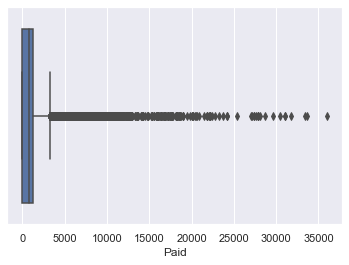

In [30]:
for ele in int_array:
    plot_box(ele,df)

In [31]:
df.describe()

,Age,Travelling_with,Paid
count,12700.000000,12970.000000,12970.000000
mean,28.771969,1.511488,1392.557672
std,14.387261,1.042500,2695.986980
min,0.000000,1.000000,0.000000
25%,19.000000,1.000000,0.000000
50%,27.000000,1.000000,729.000000
75%,38.000000,2.000000,1299.000000
max,79.000000,8.000000,35987.000000


Here we are dropping roomservice,foodcourt,shoppingmall,spa,vrdeck as they wont help in model prediction

In [32]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,From,Travelling_with,Paid
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False,Train,1,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True,Train,1,736.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False,Train,1,10383.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False,Train,2,5176.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True,Train,1,1091.0


In [33]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [34]:
df.isnull().sum()

HomePlanet            0
CryoSleep             0
Cabin                 0
Destination           0
Age                   0
VIP                   0
Transported        4277
From                  0
Travelling_with       0
Paid                  0
dtype: int64

In [35]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,From,Travelling_with,Paid
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False,Train,1,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True,Train,1,736.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False,Train,1,10383.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False,Train,2,5176.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True,Train,1,1091.0


## Encoding

In [36]:
df['Deck'] = df['Cabin'].apply(lambda x:x[0])
df['Num'] = df['Cabin'].str.extract("(\d+)").astype('int')
df['Side'] = df['Cabin'].apply(lambda x:x[-1])

In [37]:
df = df.drop(columns='Cabin')

In [38]:
df.select_dtypes(include='object').columns.values

array(['HomePlanet', 'Destination', 'Transported', 'From', 'Deck', 'Side'],
      dtype=object)

In [39]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,From,Travelling_with,Paid,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,False,Train,1,0.0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,True,Train,1,736.0,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,False,Train,1,10383.0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,False,Train,2,5176.0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,True,Train,1,1091.0,F,1,S


In [40]:
df = pd.get_dummies(df,columns=['HomePlanet', 'Destination','Deck','Side'],drop_first=True)
df.head()

,CryoSleep,Age,VIP,Transported,From,Travelling_with,Paid,Num,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,False,39.0,False,False,Train,1,0.0,0,1,0,0,1,1,0,0,0,0,0,0,0
1,False,24.0,False,True,Train,1,736.0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,False,58.0,True,False,Train,1,10383.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,False,33.0,False,False,Train,2,5176.0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,False,16.0,False,True,Train,1,1091.0,1,0,0,0,1,0,0,0,0,1,0,0,1


## Outliers 

In [41]:
df.select_dtypes(exclude='object').columns.values

array(['CryoSleep', 'Age', 'VIP', 'Travelling_with', 'Paid', 'Num',
       'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_S'], dtype=object)

<AxesSubplot:xlabel='Age'>

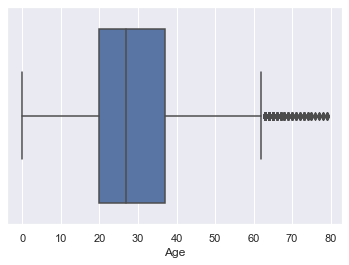

In [42]:
sns.boxplot(df['Age'])

Here there is no need to treat outliers as age of 80 is acceptable

## EDA 

In [43]:
# from pandas_profiling import ProfileReport
# report = ProfileReport(temp)
# report.to_file('temp.html')

In [44]:
df.head()

,CryoSleep,Age,VIP,Transported,From,Travelling_with,Paid,Num,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,False,39.0,False,False,Train,1,0.0,0,1,0,0,1,1,0,0,0,0,0,0,0
1,False,24.0,False,True,Train,1,736.0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,False,58.0,True,False,Train,1,10383.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,False,33.0,False,False,Train,2,5176.0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,False,16.0,False,True,Train,1,1091.0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [45]:
df.corr()

,CryoSleep,Age,VIP,Travelling_with,Paid,Num,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
CryoSleep,1.000000,-0.063832,-0.076891,0.058163,-0.359336,-0.039509,0.100785,0.034249,0.087826,-0.115680,0.116176,0.042102,-0.060095,-0.114743,-0.221893,0.241768,-0.021530,0.011691
Age,-0.063832,1.000000,0.080695,-0.128663,0.169913,-0.134102,0.215929,0.023945,-0.031017,0.000723,0.099801,0.122850,0.079064,0.035101,-0.019477,-0.204622,0.013862,0.014432
VIP,-0.076891,0.080695,1.000000,0.002248,0.164051,-0.090311,0.139359,0.044423,-0.005448,-0.031201,0.064441,0.061266,0.060625,-0.003278,-0.055222,-0.091240,-0.004272,-0.011078
Travelling_with,0.058163,-0.128663,0.002248,1.000000,0.011181,-0.043442,0.101172,-0.017314,-0.040471,-0.016310,0.071124,0.076218,-0.000411,-0.046602,-0.101262,0.035221,-0.006673,0.005798
Paid,-0.359336,0.169913,0.164051,0.011181,1.000000,-0.201849,0.384971,-0.066957,-0.089837,-0.052358,0.166894,0.265006,0.075376,-0.011444,-0.107078,-0.225739,0.045893,0.005580
Num,-0.039509,-0.134102,-0.090311,-0.043442,-0.201849,1.000000,-0.480172,0.058128,0.106533,0.061513,-0.261408,-0.255554,-0.214076,-0.193313,0.448216,0.156183,-0.033699,-0.014261
HomePlanet_Europa,0.100785,0.215929,0.139359,0.101172,0.384971,-0.480172,1.000000,-0.288282,-0.160735,-0.163951,0.539515,0.526383,0.096036,-0.072956,-0.393232,-0.351675,0.045437,0.022563
HomePlanet_Mars,0.034249,0.023945,0.044423,-0.017314,-0.066957,0.058128,-0.288282,1.000000,-0.117632,0.179694,-0.158649,-0.155657,0.213615,0.147286,0.339122,-0.322694,-0.014883,-0.008938
Destination_PSO J318.5-22,0.087826,-0.031017,-0.005448,-0.040471,-0.089837,0.106533,-0.160735,-0.117632,1.000000,-0.490082,-0.093712,-0.077380,-0.056966,-0.055523,-0.014250,0.200361,-0.009234,-0.010445
Destination_TRAPPIST-1e,-0.115680,0.000723,-0.031201,-0.016310,-0.052358,0.061513,-0.163951,0.179694,-0.490082,1.000000,-0.104763,-0.097027,0.015016,0.092831,0.113955,-0.041424,0.007226,-0.005469


<AxesSubplot:>

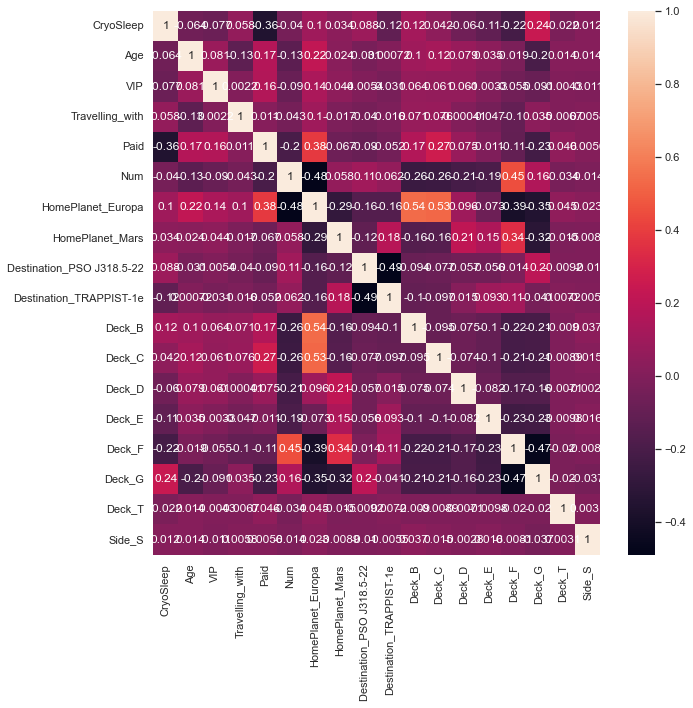

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [47]:
df.head()

,CryoSleep,Age,VIP,Transported,From,Travelling_with,Paid,Num,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,False,39.0,False,False,Train,1,0.0,0,1,0,0,1,1,0,0,0,0,0,0,0
1,False,24.0,False,True,Train,1,736.0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,False,58.0,True,False,Train,1,10383.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,False,33.0,False,False,Train,2,5176.0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,False,16.0,False,True,Train,1,1091.0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  bool   
 1   Age                        12970 non-null  float64
 2   VIP                        12970 non-null  bool   
 3   Transported                8693 non-null   object 
 4   From                       12970 non-null  object 
 5   Travelling_with            12970 non-null  int64  
 6   Paid                       12970 non-null  float64
 7   Num                        12970 non-null  int32  
 8   HomePlanet_Europa          12970 non-null  uint8  
 9   HomePlanet_Mars            12970 non-null  uint8  
 10  Destination_PSO J318.5-22  12970 non-null  uint8  
 11  Destination_TRAPPIST-1e    12970 non-null  uint8  
 12  Deck_B                     12970 non-null  uint8  
 13  Deck_C                     12970 non-null  uin

In [49]:
df['CryoSleep'] = df['CryoSleep'].apply(lambda x:int(x))

In [50]:
df['VIP'] = df['VIP'].apply(lambda x:int(x))

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  int64  
 1   Age                        12970 non-null  float64
 2   VIP                        12970 non-null  int64  
 3   Transported                8693 non-null   object 
 4   From                       12970 non-null  object 
 5   Travelling_with            12970 non-null  int64  
 6   Paid                       12970 non-null  float64
 7   Num                        12970 non-null  int32  
 8   HomePlanet_Europa          12970 non-null  uint8  
 9   HomePlanet_Mars            12970 non-null  uint8  
 10  Destination_PSO J318.5-22  12970 non-null  uint8  
 11  Destination_TRAPPIST-1e    12970 non-null  uint8  
 12  Deck_B                     12970 non-null  uint8  
 13  Deck_C                     12970 non-null  uin

In [52]:
df.head()

,CryoSleep,Age,VIP,Transported,From,Travelling_with,Paid,Num,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0,39.0,0,False,Train,1,0.0,0,1,0,0,1,1,0,0,0,0,0,0,0
1,0,24.0,0,True,Train,1,736.0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,0,58.0,1,False,Train,1,10383.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,0,33.0,0,False,Train,2,5176.0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,0,16.0,0,True,Train,1,1091.0,1,0,0,0,1,0,0,0,0,1,0,0,1


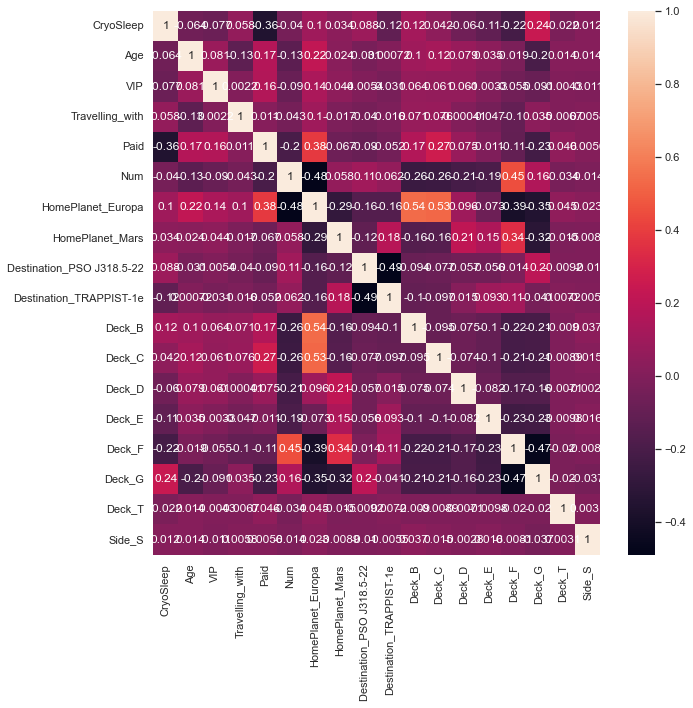

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Feature Scaling

In [54]:
trainee = df[df['From']=='Train']
testee = df[df['From']=='Test']

In [55]:
trainee = trainee.drop(columns='From')
testee = testee.drop(columns='From')
trainee.head()

,CryoSleep,Age,VIP,Transported,Travelling_with,Paid,Num,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0,39.0,0,False,1,0.0,0,1,0,0,1,1,0,0,0,0,0,0,0
1,0,24.0,0,True,1,736.0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,0,58.0,1,False,1,10383.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,0,33.0,0,False,2,5176.0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,0,16.0,0,True,1,1091.0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [56]:
trainee['Transported'] = trainee['Transported'].apply(lambda x:int(x))

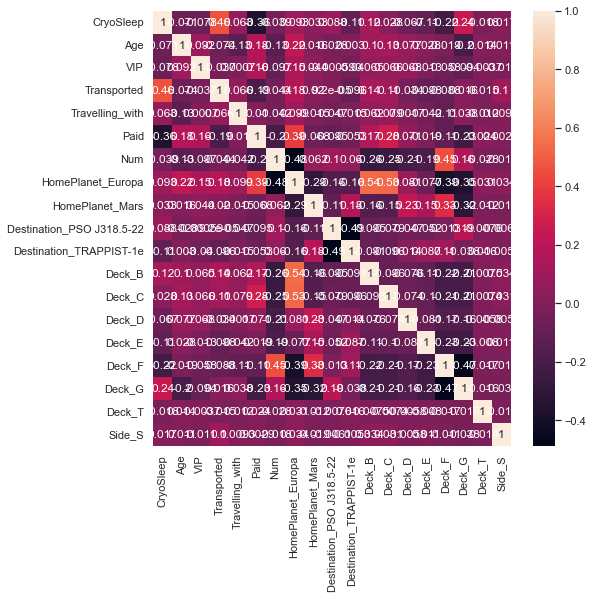

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(trainee.corr(),annot=True)
plt.show()

In [58]:
x = trainee.drop(columns='Transported')
y = trainee['Transported']
x1 = trainee.drop(columns='Transported')
y1 = trainee[']']
x.head()

,CryoSleep,Age,VIP,Travelling_with,Paid,Num,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0,39.0,0,1,0.0,0,1,0,0,1,1,0,0,0,0,0,0,0
1,0,24.0,0,1,736.0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,0,58.0,1,1,10383.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,0,33.0,0,2,5176.0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,0,16.0,0,1,1091.0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [59]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x['Age'] = std.fit_transform(x[['Age']])
x['Travelling_with'] = std.fit_transform(x[['Travelling_with']])
x['Paid'] = std.fit_transform(x[['Paid']])

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
temp = x
vif = pd.DataFrame()
vif['Vif'] = [variance_inflation_factor(temp,i) for i in range (temp.shape[1])]
vif['names'] = x.columns
vif


,Vif,names
0,2.326508,CryoSleep
1,1.111770,Age
2,1.077862,VIP
3,1.049679,Travelling_with
4,1.511850,Paid
5,3.816170,Num
6,4.637694,HomePlanet_Europa
7,2.039887,HomePlanet_Mars
8,1.561186,Destination_PSO J318.5-22
9,4.549344,Destination_TRAPPIST-1e


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [63]:
x_train

,CryoSleep,Age,VIP,Travelling_with,Paid,Num,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
840,1,-0.406381,0,-0.491161,-0.250406,135,0,0,0,0,0,0,0,0,0,1,0,1
3739,1,-1.173560,0,2.354651,-0.520174,160,0,0,0,1,0,0,0,0,0,1,0,0
1577,0,1.406953,0,-0.491161,0.117796,269,0,0,0,1,0,0,0,0,0,1,0,0
5710,1,-0.266893,0,-0.491161,-0.520174,160,0,1,0,1,0,0,0,0,0,1,0,0
3671,1,-0.615611,0,-0.491161,-0.520174,645,0,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,1.058235,0,-0.491161,-0.032075,133,0,0,0,1,0,0,0,0,1,0,0,0
5695,0,-1.452535,0,1.406047,-0.520174,385,0,1,0,1,0,0,0,1,0,0,0,0
8006,1,-0.685355,0,-0.491161,-0.520174,1377,0,0,1,0,0,0,0,0,0,1,0,1
1361,0,-0.615611,0,-0.491161,-0.250406,222,0,0,0,1,0,0,0,0,0,1,0,0


In [64]:
y_train

840     0
3739    0
1577    0
5710    0
3671    0
       ..
599     1
5695    1
8006    0
1361    0
1547    0
Name: Transported, Length: 6954, dtype: int64

In [65]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [66]:
logit.fit(x_train,y_train)

LogisticRegression()

In [67]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
print("Testing accuracy: ",accuracy_score(y_test,y_pred_test))


Training accuracy:  0.723037100949094
Testing accuracy:  0.7446808510638298


In [69]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       877
           1       0.79      0.66      0.72       862

    accuracy                           0.74      1739
   macro avg       0.75      0.74      0.74      1739
weighted avg       0.75      0.74      0.74      1739



In [70]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logit,x_test,y_test,cv=20)
accuracy

array([0.65517241, 0.71264368, 0.74712644, 0.68965517, 0.77011494,
       0.77011494, 0.71264368, 0.74712644, 0.77011494, 0.73563218,
       0.68965517, 0.74712644, 0.71264368, 0.77011494, 0.72413793,
       0.79310345, 0.72413793, 0.71264368, 0.82758621, 0.79069767])

In [71]:
accuracy.mean()

0.7401095963646084